In [34]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import pandas as pd
from sklearn.feature_selection import f_classif
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.svm import SVC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix , root_mean_squared_error, mean_squared_error
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from xgboost import XGBClassifier
import warnings
warnings.filterwarnings(action="ignore")


In [17]:
df=pd.read_csv("../data/new_data.csv")


In [ ]:
X = df[['age', 'trestbps', 'chol']].values  # لازم تكون numpy array

### K-means

In [41]:
# Calculate WCSS for 1 to 10 clusters

WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model.fit(X)
    WCSS.append(model.inertia_)

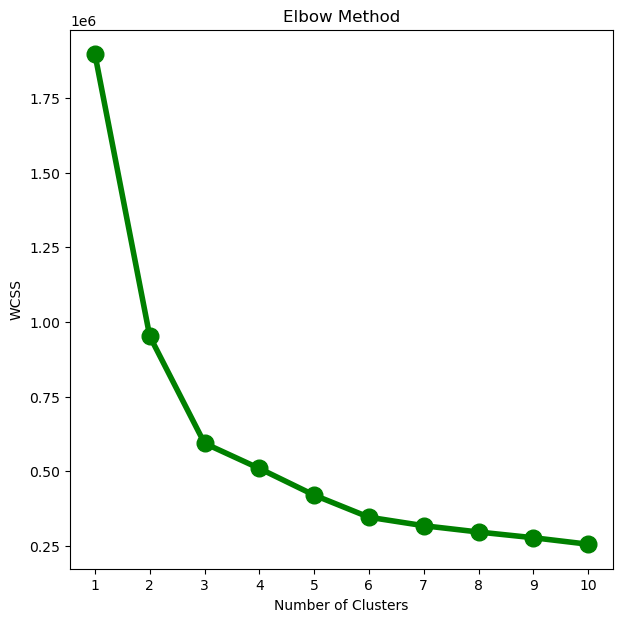

In [42]:
# Plotting the WCSS to find the elbow point
plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), WCSS, linewidth=4, markersize =12, marker='o', color='green')
plt.xticks(np.arange(1, 11))
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [43]:
# Create a KMeans model with 5 clusters
model = KMeans(n_clusters=5, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_clusters = model.fit_predict(X)

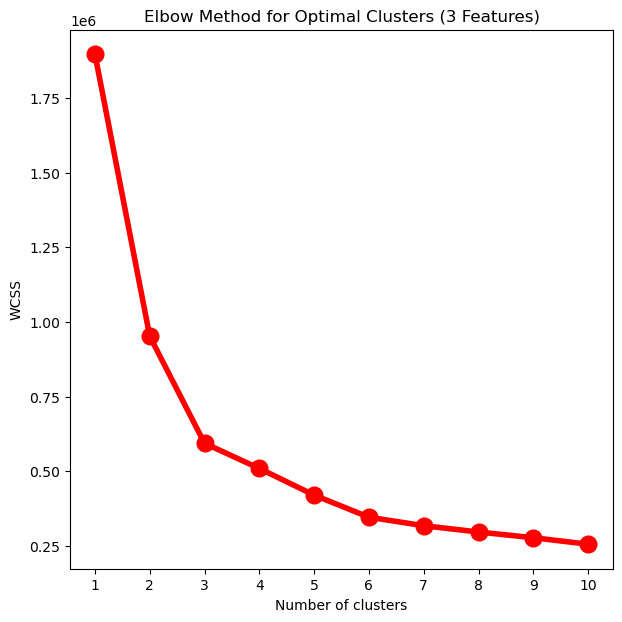

In [44]:
# Calculate WCSS for 1 to 10 clusters

WCSS = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', random_state=0)
    model.fit(X)
    WCSS.append(model.inertia_)

# Plot the Elbow Method result
plt.figure(figsize=(7, 7))
plt.plot(range(1, 11), WCSS, linewidth=4, markersize=12, marker='o', color='red')
plt.xticks(np.arange(1, 11))
plt.title('Elbow Method for Optimal Clusters (3 Features)')
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

###  Hierarchical Clustering (dendrogram analysis)

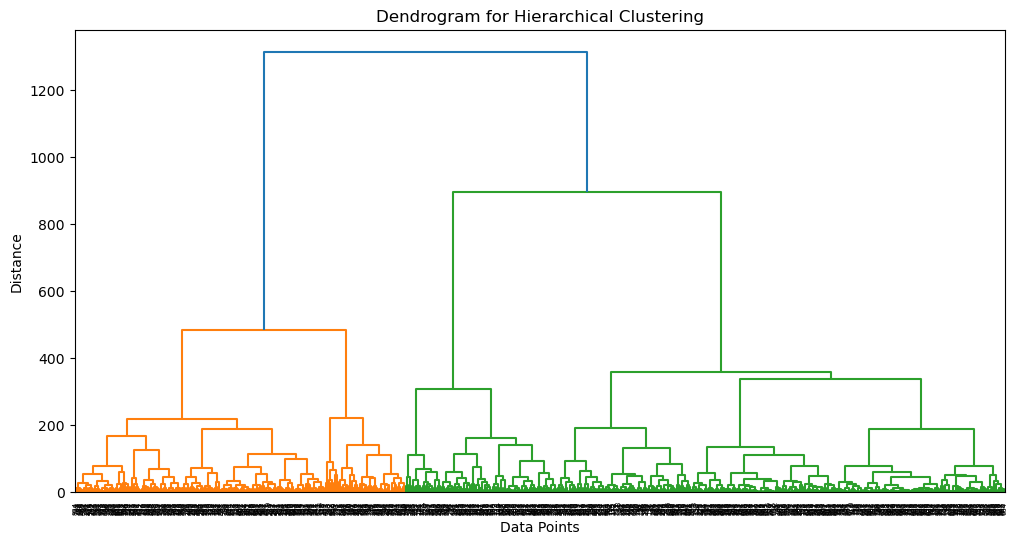

In [48]:
plt.figure(figsize=(12, 6))
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Data Points")
plt.ylabel("Distance")

# linkage = method to define how to merge clusters
dendrogram = sch.dendrogram(sch.linkage(X, method='ward'))

plt.show()


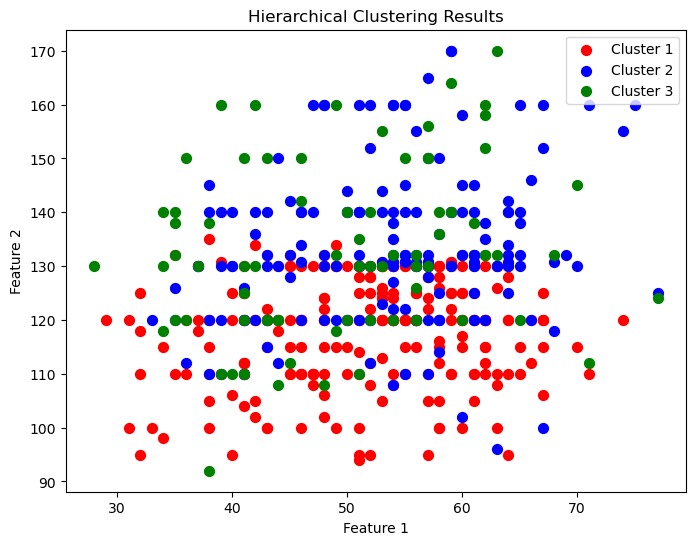

In [49]:
plt.figure(figsize=(8, 6))
plt.scatter(X[y_clusters == 0, 0], X[y_clusters == 0, 1], s=50, color='red', label='Cluster 1')
plt.scatter(X[y_clusters == 1, 0], X[y_clusters == 1, 1], s=50, color='blue', label='Cluster 2')
plt.scatter(X[y_clusters == 2, 0], X[y_clusters == 2, 1], s=50, color='green', label='Cluster 3')

plt.title("Hierarchical Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()
